In [1]:
#!pip install matplotlib

In [2]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from protocol.datum.file_datum_reader import open_datum_file
from protocol.envelope import DataExtractorOutputEnvelope, ReceiveServerOutputEnvelope, Envelope
from protocol.envelope.indus_das_envelope import IndusDASEnvelope
from protocol.message import RSMessage
from protocol.message.de_message import DEMessage
import pathlib

In [3]:
base_dir = pathlib.Path().parent.absolute()
file_path = os.path.join(base_dir, "data", "sensor_1_full_00024170_10181607_10181806_1.bin")
file_path 

de_message = DEMessage()
rs_message = RSMessage()

# /home/edwinobando/fs_protocol/data/sensor_1_full_00024170_10181607_10181806_1.bin

In [4]:
from protocol.message import FileNotOpen, FilePackageReader
from protocol.envelope import IndusDASEnvelope
from protocol.message.rs_file_reader import open_rs_file
package_reader = FilePackageReader()
indus_das_envelope = IndusDASEnvelope()

package_read = 0
# read from file package by package
package_reader.open_file(file_path)

# for package in package_reader.yield_raw_headers():
for offset in package_reader.yield_package_offsets_from_file():
    package_read += 1
    header = indus_das_envelope.decode(package_reader.mm[package_reader.indus_offset:package_reader.indus_offset + IndusDASEnvelope.SUMMARY_DATA_OFFSET]) 



all_data = []
nn = 0
message_dict = {}

signals_sum = np.zeros((20000,200))

with open_rs_file(file_path) as file_reader:
    for package_number, message_bytes in file_reader.yield_messages():
        rs_envelope = ReceiveServerOutputEnvelope()
        message_dict[nn] = rs_envelope.decode(message_bytes)

        rs_message = RSMessage()
        full_data = rs_message.get_full_package(message_bytes)

        all_data.append(full_data['payload'])

        signals_sum[:,nn] = full_data['summary']

        nn+=1

all_data = np.array(all_data)

Signature to detect: RECEVSVR.
File /home/edwinobando/fs_protocol/data/sensor_1_full_00024170_10181607_10181806_1.bin opened ...
File size is 1016112800 bytes.
Found (first) signature RECEVSVR at offset 0 ...
Found signature RECEVSVR at offset 0.
Read 5080564 bytes from offset 0.
Found signature RECEVSVR at offset 5080564.
Read 5080564 bytes from offset 5080564.
Found signature RECEVSVR at offset 10161128.
Read 5080564 bytes from offset 10161128.
Found signature RECEVSVR at offset 15241692.
Read 5080564 bytes from offset 15241692.
Found signature RECEVSVR at offset 20322256.
Read 5080564 bytes from offset 20322256.
Found signature RECEVSVR at offset 25402820.
Read 5080564 bytes from offset 25402820.
Found signature RECEVSVR at offset 30483384.
Read 5080564 bytes from offset 30483384.
Found signature RECEVSVR at offset 35563948.
Read 5080564 bytes from offset 35563948.
Found signature RECEVSVR at offset 40644512.
Read 5080564 bytes from offset 40644512.
Found signature RECEVSVR at offse

In [5]:
n = 100e6/header['sampling_freq']*header['spatial_decimation']
m = header['samplingFreq']/10*header['frameDecimation']



In [6]:
header

{'signature': 'INDUSDAS',
 'package_length': 5080508,
 'protocol_version': 'PRO_000D',
 'software_version': '21052402',
 'firmware_version': 'FPGA2400',
 'serial_no': 6,
 'source_type': 1,
 'summary_type': 2,
 'payload_type': 1,
 'bps_source': 2,
 'bps_summary': 4,
 'bps_payload': 2,
 'timestamp': 767853851,
 'gps_counter': 40000555,
 'sampling_freq': 10000,
 'channel_num': 10000,
 'sampling_num': 1,
 'data_type_id': 1251,
 'channel_spacing': 10,
 'start': 0,
 'conversion_factor': 10430,
 'hpf_id': 1251,
 'frame_count_err': 0,
 'first_frame_no': 2967970564,
 'last_frame_no': 2967970813,
 'last_frame_timestamp': 768202238,
 'last_frame_ns': 60420447,
 'frame_decimation': 4,
 'spatial_decimation': 1,
 'frames_in_package': 250,
 'fpga_reg': [20316559,
  4128570488,
  253622538,
  1326985977,
  855199512,
  4178186013,
  4235785748,
  26149174,
  0,
  0,
  126062688,
  20000,
  0,
  20000,
  2,
  50331924,
  7,
  98304,
  444,
  98304,
  444,
  4096,
  4096,
  0,
  0,
  3845,
  4175711,
  

2500.0

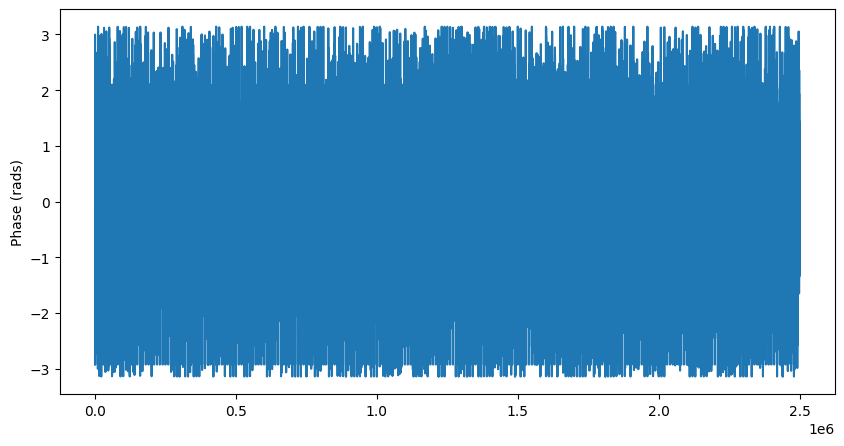

In [7]:

signal = all_data[0,...].flatten()
fig,ax0 = plt.subplots(figsize=(10,5))
factor = header['conversion_factor']
ax0.plot(signal/factor)
ax0.set_ylabel('Phase (rads)')

fs_dec = header['sampling_freq']/header['frameDecimation']

fs_dec


/tmp/ipykernel_28264/435169959.py:8: RuntimeWarning: divide by zero encountered in log
  ax1.imshow(np.log(np.abs(signals_sum)), aspect='auto',cmap='seismic_r')


Text(0.5, 1.0, 'Using log-scale')

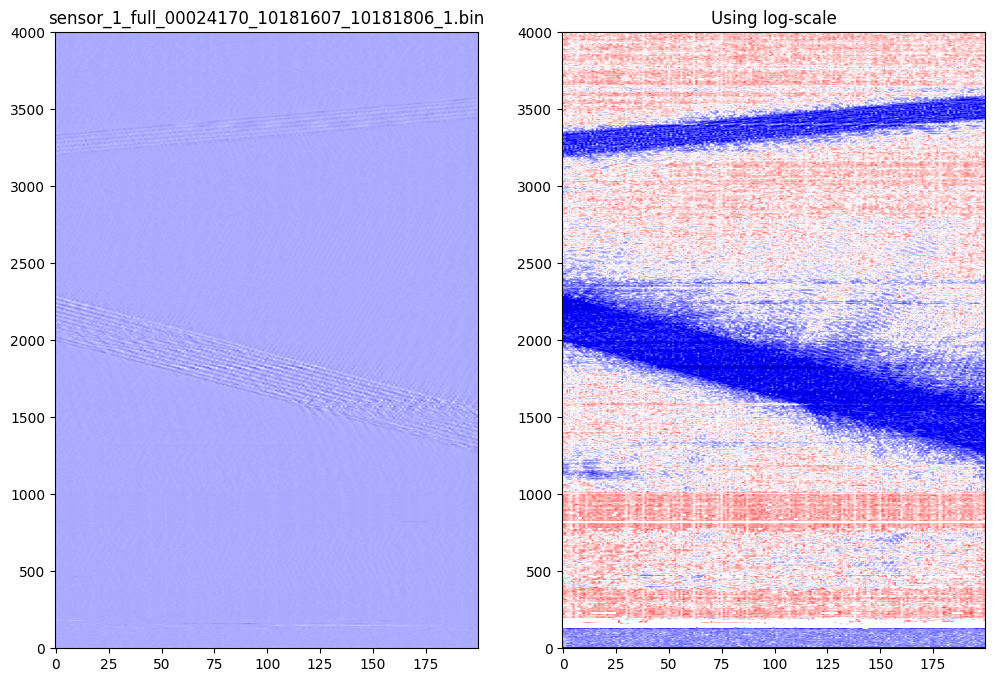

In [8]:
tmax = 20000/fs_dec

fig,(ax0,ax1) = plt.subplots(1,2, figsize=(12,8))
ax0.imshow(signals_sum, aspect='auto',cmap='seismic_r')
ax0.set_ylim(0,4000)
ax0.set_title("sensor_1_full_00024170_10181607_10181806_1.bin")

ax1.imshow(np.log(np.abs(signals_sum)), aspect='auto',cmap='seismic_r')
ax1.set_ylim(0,4000)
ax1.set_title("Using log-scale")

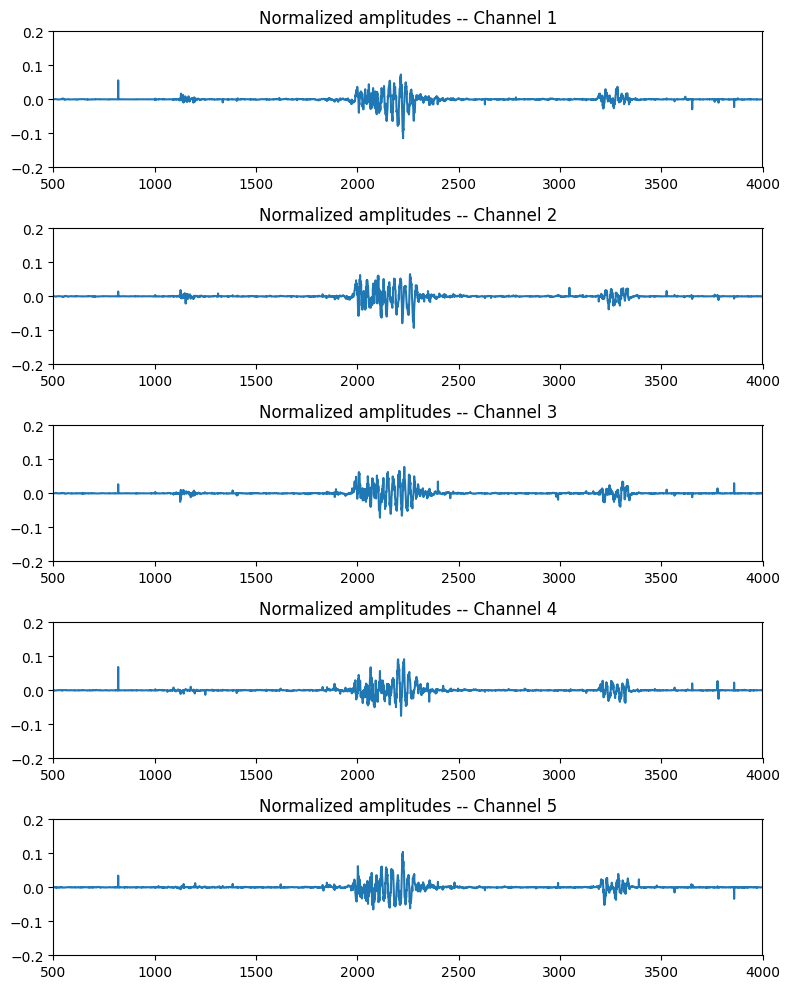

In [9]:
fig,axs = plt.subplots(5, 1, figsize=(8,10))

for i in range(5):
    axs[i].plot(signals_sum[:,i]/np.max(np.abs(signals_sum[:,i]),axis=0))

    axs[i].set_xlim(500,4000)
    axs[i].set_ylim(-0.2,0.2)
    axs[i].set_title(f'Normalized amplitudes -- Channel {i+1}')

fig.tight_layout()